In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Выборка

In [2]:
df = pd.read_csv('c:/Users/gandh/dev/unv/smoed/me/data/main_data.csv')
X = df['nu']
Y = df['E']
int_rowX = pd.read_csv('c:/Users/gandh/dev/unv/smoed/me/data/interval.csv')
int_rowY = pd.read_csv('c:/Users/gandh/dev/unv/smoed/me/data/interval2.csv')
kor = pd.read_csv('c:/Users/gandh/dev/unv/smoed/me/data/kor.csv')

Text(0.5, 0.98, 'Двумерная выборка')

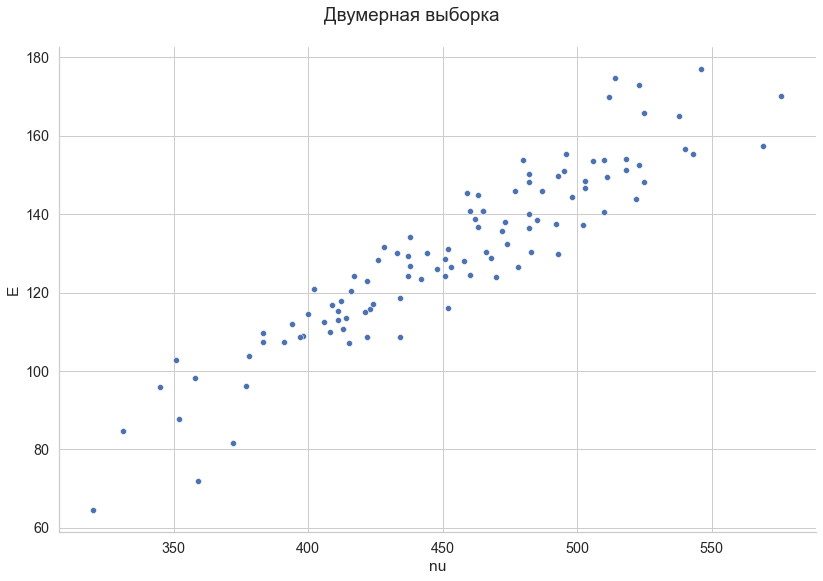

In [3]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df, x='nu', y='E', kind='scatter', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('nu', 'E')
ax.fig.suptitle('Двумерная выборка')
plt.tight_layout()
plt.savefig('pics/1.png')

## Прямые регрессии

In [4]:
N = 104
xv, yv = 453.71, 129.98
sx, sy = 53.79, 22.06
r = 0.8765

### Прямая x на y

In [5]:
regr_xy = lambda y: xv + r*(sx/sy)*(y-yv)

In [6]:
ost_var_xy = (sx**2)*(1-r**2)

### Прямая y на x

In [7]:
regr_yx = lambda x: yv + r*(sy/sx)*(x-xv)

In [8]:
ost_var_yx = (sy**2)*(1-r**2)

### График

In [9]:
# Регрессия Y на X
# ax = sns.lmplot(data=df, x='nu', y='E', height=8.27, aspect=11.7/8.27)

Text(0.5, 0.98, 'Прямые регрессии')

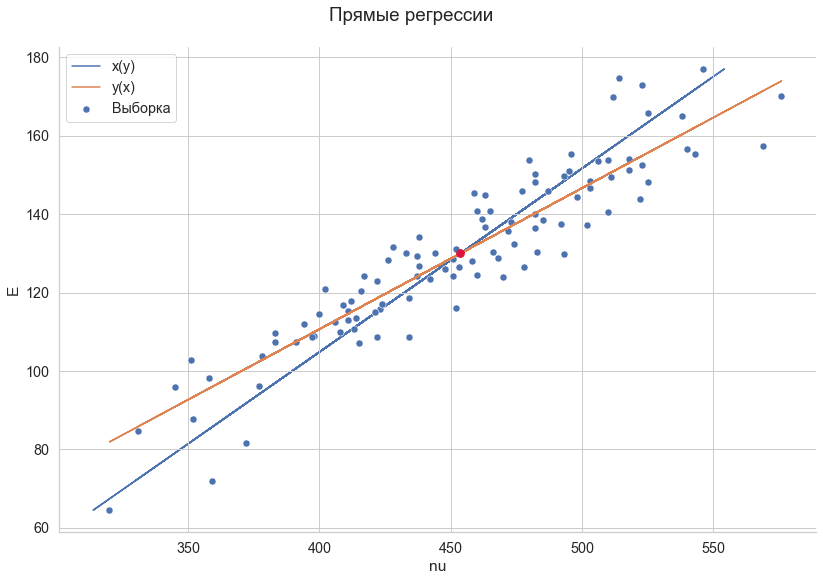

In [10]:
ax = sns.relplot(data=df, x='nu', y='E', kind='scatter', height=8.27, 
                 aspect=11.7/8.27, s=50, label='Выборка')
plt.plot(regr_xy(df['E']), df['E'], label='x(y)', zorder=0)
plt.plot(df['nu'], regr_yx(df['nu']), label='y(x)', zorder=1)
plt.scatter(xv, yv, s=60, c='crimson', zorder=2)
ax.set_axis_labels('nu', 'E')
ax.fig.suptitle('Прямые регрессии')
plt.legend()
plt.tight_layout()
plt.savefig('pics/2.png')

In [11]:
ost_var_xy
ost_var_yx

670.5306201057754

112.77855935190006

## Выборочное корреляционное отношение

### Таблица

In [12]:
kor.loc[1:7,'Xi'] = [np.sum(kor.iloc[i,1:8]) for i in range(1,8)]
kor.iloc[8,1:8] = [np.sum(kor.iloc[1:8,i]) for i in range(1,8)]
kor.iloc[8,8] = 104

#### Средний x для данного y (условный выборочный x)

In [13]:
kor.loc[1:7,'yX'] =[(np.dot(kor.iloc[0,1:8],kor.iloc[i,1:8])/kor.loc[i,'Xi']).round(2) for i in range(1,8)]

#### Средний y для данного x (условный выборочный y)

In [14]:
kor.iloc[9,1:8] =[(np.dot(kor.iloc[1:8,0],kor.iloc[1:8,i])/kor.iloc[8,i]).round(2) for i in range(1,8)]

#### Групповая выборочная дисперсия X

In [15]:
kor['D_grX'] = np.NaN
for i in range(1,8):
    x0_arg_kv = kor.iloc[0,1:8]**2
    dt = np.dot(x0_arg_kv,kor.iloc[i,1:8])/kor.loc[i,'Xi']
    dt -= kor.loc[i,'yX']**2
    kor.loc[i,'D_grX'] =(dt).round(2)

#### Групповая выборочная дисперсия Y

In [16]:
kor = kor.append(pd.Series(dtype='float64'), ignore_index=True)
for i in range(1,8):
    y0_arg_kv = kor.iloc[1:8,0]**2
    dt2 = np.dot(y0_arg_kv,kor.iloc[1:8,i])/kor.iloc[8,i]
    dt2 -= kor.iloc[9,i]**2
    kor.iloc[10,i] =(dt2).round(2)

In [17]:
kor

,yi,x1,x2,x3,x4,x5,x6,x7,Xi,yX,D_grX
0,NaN,338.50,375.5,412.50,449.50,486.50,523.50,559.00,NaN,NaN,NaN
1,72.55,1.00,1.0,0.00,0.00,0.00,0.00,0.00,2.0,357.00,342.25
2,88.65,3.00,2.0,0.00,0.00,0.00,0.00,0.00,5.0,353.30,328.56
3,104.75,1.00,5.0,8.00,1.00,0.00,0.00,0.00,15.0,397.70,693.63
4,120.85,0.00,0.0,14.00,11.00,2.00,0.00,0.00,27.0,433.06,536.99
5,136.95,0.00,0.0,1.00,12.00,12.00,2.00,0.00,27.0,470.06,638.07
6,153.05,0.00,0.0,0.00,1.00,10.00,8.00,2.00,21.0,505.74,715.28
7,169.05,0.00,0.0,0.00,0.00,0.00,5.00,2.00,7.0,533.64,260.24
8,NaN,5.00,8.0,23.00,25.00,24.00,15.00,4.00,104.0,NaN,NaN
9,NaN,88.65,96.7,115.95,129.22,142.32,156.24,161.05,NaN,NaN,NaN


### Дисперсии X к Y

#### Внутригрупповая дисперсия X к Y

In [18]:
D_vngr_xy = np.dot(kor.loc[1:7,'Xi'],kor.loc[1:7,'D_grX'])/kor.iloc[8,8]
D_vngr_xy.round(4)

589.432

#### Межгрупповая дисперсия X к Y

In [19]:
kv_mezh_xy = (kor.loc[1:7,'yX']-xv)**2
D_mezh_xy = np.dot(kor.loc[1:7,'Xi'],kv_mezh_xy)/kor.iloc[8,8]
D_mezh_xy.round(4)

2273.8036

#### Общая дисперсия X к Y

In [20]:
D_obsh_xy = D_vngr_xy + D_mezh_xy
D_obsh_xy.round(4)

2863.2357

#### Выборочное корреляционное отношение X к Y

In [21]:
eta_xy = np.sqrt(D_mezh_xy/D_obsh_xy)
eta_xy.round(4)
r

0.8911

0.8765

### Дисперсии Y к X

#### Внутригрупповая дисперсия Y к X

In [22]:
D_vngr_yx = np.dot(kor.iloc[8,1:8],kor.iloc[10,1:8])/kor.iloc[8,8]
D_vngr_yx

98.90625

#### Межгрупповая дисперсия Y к X

In [23]:
kv_mezh_yx = (kor.iloc[9,1:8]-yv)**2
D_mezh_yx = np.dot(kor.iloc[8,1:8],kv_mezh_yx)/kor.iloc[8,8]
D_mezh_yx.round(4)

382.7202

#### Общая дисперсия Y к X

In [24]:
D_obsh_yx = D_vngr_yx + D_mezh_yx
D_obsh_yx.round(4)

481.6264

#### Выборочное корреляционное отношение Y к X

In [25]:
eta_yx = np.sqrt(D_mezh_yx/D_obsh_yx)
eta_yx.round(4)
r

0.8914

0.8765

## Корреляционные кривые

In [26]:
kor

,yi,x1,x2,x3,x4,x5,x6,x7,Xi,yX,D_grX
0,NaN,338.50,375.5,412.50,449.50,486.50,523.50,559.00,NaN,NaN,NaN
1,72.55,1.00,1.0,0.00,0.00,0.00,0.00,0.00,2.0,357.00,342.25
2,88.65,3.00,2.0,0.00,0.00,0.00,0.00,0.00,5.0,353.30,328.56
3,104.75,1.00,5.0,8.00,1.00,0.00,0.00,0.00,15.0,397.70,693.63
4,120.85,0.00,0.0,14.00,11.00,2.00,0.00,0.00,27.0,433.06,536.99
5,136.95,0.00,0.0,1.00,12.00,12.00,2.00,0.00,27.0,470.06,638.07
6,153.05,0.00,0.0,0.00,1.00,10.00,8.00,2.00,21.0,505.74,715.28
7,169.05,0.00,0.0,0.00,0.00,0.00,5.00,2.00,7.0,533.64,260.24
8,NaN,5.00,8.0,23.00,25.00,24.00,15.00,4.00,104.0,NaN,NaN
9,NaN,88.65,96.7,115.95,129.22,142.32,156.24,161.05,NaN,NaN,NaN


### Параболическая регерессия Y на X

In [27]:
df_prbl_x = pd.DataFrame({'x': kor.iloc[0,1:8], 'n': kor.iloc[8,1:8], 'y': kor.iloc[9,1:8]})

In [28]:
for i in range(1,5):
    df_prbl_x[f'nx{i}'] = df_prbl_x['n']*(df_prbl_x['x']**i)
df_prbl_x['ny'] = df_prbl_x['n']*df_prbl_x['y']
df_prbl_x['nyx1'] = df_prbl_x['nx1']*df_prbl_x['y']
df_prbl_x['nyx2'] = df_prbl_x['nx2']*df_prbl_x['y']

df_prbl_xf = df_prbl_x.append(df_prbl_x.sum(), ignore_index=True)
df_prbl_xf.iloc[-1,[0,2]] = np.NaN
df_prbl_xf.to_csv('data/parabolxy.csv', index=False)
df_prbl_xf

,x,n,y,nx1,nx2,nx3,nx4,ny,nyx1,nyx2
0,338.5,5.0,88.65,1692.5,572911.25,1.939305e+08,6.564546e+10,443.25,150040.125,5.078858e+07
1,375.5,8.0,96.70,3004.0,1128002.00,4.235648e+08,1.590486e+11,773.60,290486.800,1.090778e+08
2,412.5,23.0,115.95,9487.5,3913593.75,1.614357e+09,6.659224e+11,2666.85,1100075.625,4.537812e+08
3,449.5,25.0,129.22,11237.5,5051256.25,2.270540e+09,1.020608e+12,3230.50,1452109.750,6.527233e+08
4,486.5,24.0,142.32,11676.0,5680374.00,2.763502e+09,1.344444e+12,3415.68,1661728.320,8.084308e+08
5,523.5,15.0,156.24,7852.5,4110783.75,2.151995e+09,1.126570e+12,2343.60,1226874.600,6.422689e+08
6,559.0,4.0,161.05,2236.0,1249924.00,6.987075e+08,3.905775e+11,644.20,360107.800,2.013003e+08
7,NaN,104.0,NaN,47186.0,21706845.00,1.011660e+10,4.772815e+12,13517.68,6241423.020,2.918371e+09


In [29]:
M1 = np.array([[df_prbl_xf.loc[7,'nx4'],df_prbl_xf.loc[7,'nx3'],df_prbl_xf.loc[7,'nx2']],
               [df_prbl_xf.loc[7,'nx3'],df_prbl_xf.loc[7,'nx2'],df_prbl_xf.loc[7,'nx1']],
               [df_prbl_xf.loc[7,'nx2'],df_prbl_xf.loc[7,'nx1'],df_prbl_xf.loc[7,'n']]])
v1 = np.array([df_prbl_xf.loc[7,'nyx2'],df_prbl_xf.loc[7,'nyx1'],df_prbl_xf.loc[7,'ny']])
a, b, c = np.linalg.solve(M1, v1)
parab_regr = lambda x: a*x*x+b*x+c
a, b, c

(-0.00032576744901908, 0.6562995075841369, -99.79889464387033)

Text(0.5, 0.98, 'Параболическая регрессия')

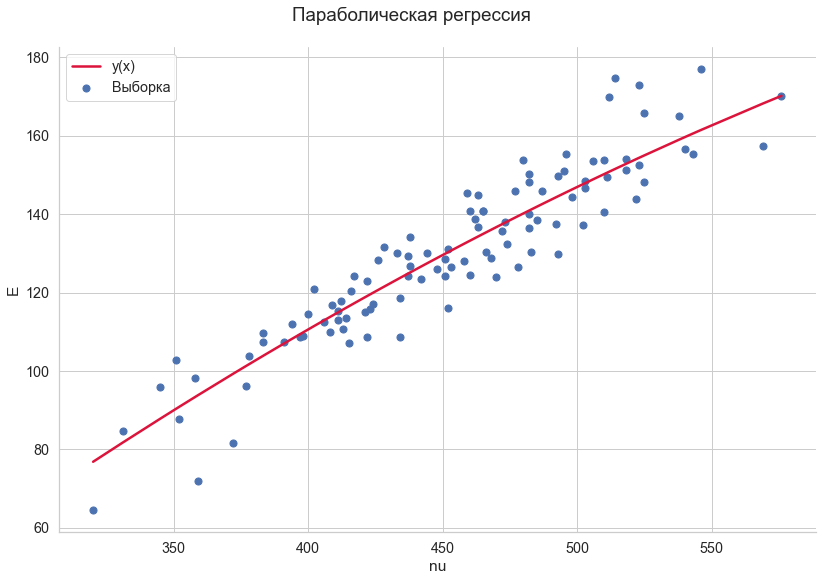

In [30]:
ax = sns.relplot(data=df, x='nu', y=parab_regr(df['nu']), kind='line', linewidth=2.5,
                 height=8.27, aspect=11.7/8.27, label='y(x)', color='crimson')
plt.scatter(df['nu'], df['E'], s=50, label='Выборка')
ax.set_axis_labels('nu', 'E')
ax.fig.suptitle('Параболическая регрессия')
plt.legend()
plt.tight_layout()
plt.savefig('pics/3.png')

### Степенная регерессия Y на X

In [31]:
df_step_x = pd.DataFrame({'x': kor.iloc[0,1:8], 'n': kor.iloc[8,1:8], 'y': kor.iloc[9,1:8]})

In [32]:
df_step_x['log_x'] = np.log(df_step_x['x'])
df_step_x['log_x2'] = np.log(df_step_x['x'])**2
df_step_x['log_y'] = np.log(df_step_x['y'])
df_step_x['log_x_log_y'] = df_step_x['log_x']*df_step_x['log_y']

df_step_xf = df_step_x.append(df_step_x.sum(), ignore_index=True)
df_step_xf.iloc[-1,[0,2]] = np.NaN
df_step_xf.round(3).to_csv('data/stepxy.csv', index=False)
df_step_xf

,x,n,y,log_x,log_x2,log_y,log_x_log_y
0,338.5,5.0,88.65,5.824524,33.925081,4.484696,26.121220
1,375.5,8.0,96.70,5.928258,35.144249,4.571613,27.101706
2,412.5,23.0,115.95,6.022236,36.267329,4.753159,28.624647
3,449.5,25.0,129.22,6.108136,37.309324,4.861516,29.694802
4,486.5,24.0,142.32,6.187237,38.281900,4.958078,30.676803
5,523.5,15.0,156.24,6.260537,39.194324,5.051393,31.624435
6,559.0,4.0,161.05,6.326149,40.020167,5.081715,32.147688
7,NaN,104.0,NaN,42.657078,260.142373,33.762171,205.991301


In [40]:
bf = (df_step_xf.loc[7,'log_x_log_y']-(df_step_xf.loc[7,'log_x']*df_step_xf.loc[7,'log_y']))/(df_step_xf.loc[7,'log_x2']-(df_step_xf.loc[7,'log_x']**2))
bf

0.7914183913599376

In [33]:
M1 = np.array([[1,df_step_xf.loc[7,'log_x']],
               [df_step_xf.loc[7,'log_x'],df_step_xf.loc[7,'log_x2']]])
v1 = np.array([df_step_xf.loc[7,'log_y'],df_step_xf.loc[7,'log_x_log_y']])
a2, b2 = np.linalg.solve(M1, v1)
step_regr = lambda x: np.exp(a2)*(x**b2)
np.exp(a2), b2, a2

(1.0025783273979973, 0.7914183913599375, 0.0025750092142638767)

In [34]:
dfst = df.copy()
dfst['1'] = parab_regr(dfst['nu'])
dfst['2'] = step_regr(dfst['nu'])
dfstm = dfst.melt(id_vars='nu', value_vars=['1','2'])
dfstm

,nu,variable,value
0,460,1,133.166487
1,525,1,154.968694
2,503,1,147.897661
3,482,1,140.853871
4,470,1,136.699844
...,...,...,...
203,543,2,146.382511
204,538,2,145.314726
205,523,2,142.098844
206,434,2,122.595969


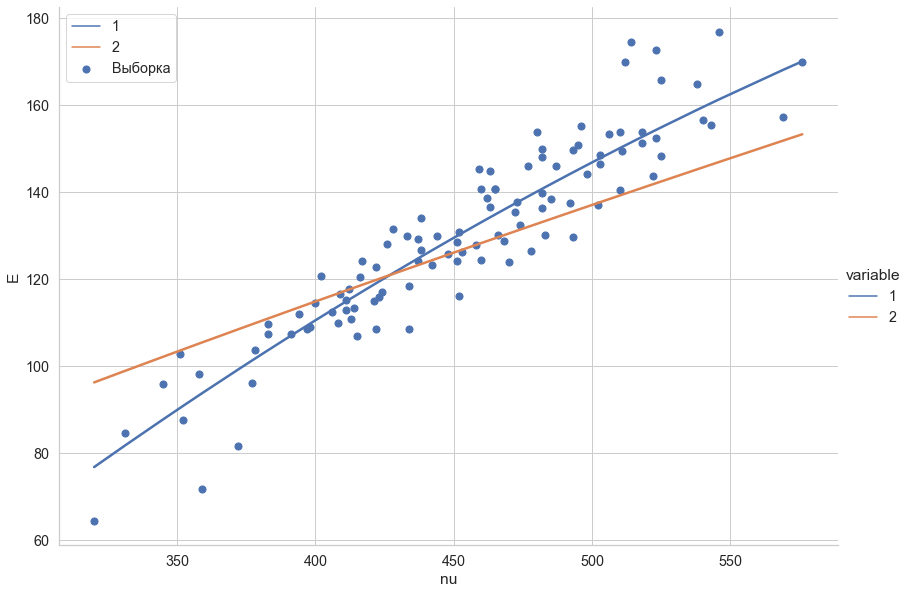

In [35]:
ax = sns.relplot(data=dfstm, x='nu', y='value', hue='variable', kind='line', linewidth=2.5,
                 height=8.27, aspect=11.7/8.27)
plt.scatter(df['nu'], df['E'], s=50, label='Выборка')
ax.set_axis_labels('nu', 'E')
plt.legend()

Text(0.5, 0.98, 'Степенная регрессия')

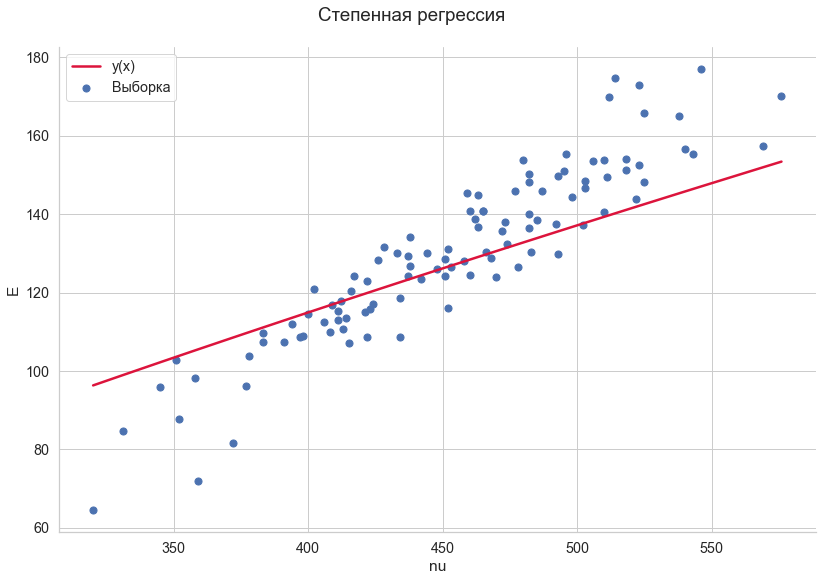

In [36]:
ax = sns.relplot(data=df, x='nu', y=step_regr(df['nu']), kind='line', linewidth=2.5,
                 height=8.27, aspect=11.7/8.27, label='y(x)', color='crimson')
plt.scatter(df['nu'], df['E'], s=50, label='Выборка')
ax.set_axis_labels('nu', 'E')
ax.fig.suptitle('Степенная регрессия')
plt.legend()
plt.tight_layout()
plt.savefig('pics/4.png')